In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Original_Medical.csv')  # Replace 'your_dataset.csv' with the actual file path

# Display the first few rows of the dataset to understand its structure
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Disease,Weight,Height
0,67,Male,208,158/88,72,NaN,114,162
1,21,Male,389,165/93,98,Diabetes,102,143
2,21,Female,324,174/99,72,Asthma,110,153
3,84,Male,383,163/100,73,Diabetes,85,176
4,66,Male,318,91/88,93,Asthma,62,184


In [22]:
missing_values = data.isnull().sum()

In [23]:
data.describe()

,Age,Cholesterol,Heart Rate,Weight,Height
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,80.315303,170.200959
std,21.249509,80.863276,20.550948,23.442304,17.548131
min,18.000000,120.000000,40.000000,40.000000,140.000000
25%,35.000000,192.000000,57.000000,60.000000,155.000000
50%,54.000000,259.000000,75.000000,80.000000,170.000000
75%,72.000000,330.000000,93.000000,100.000000,185.000000
max,90.000000,400.000000,110.000000,120.000000,200.000000


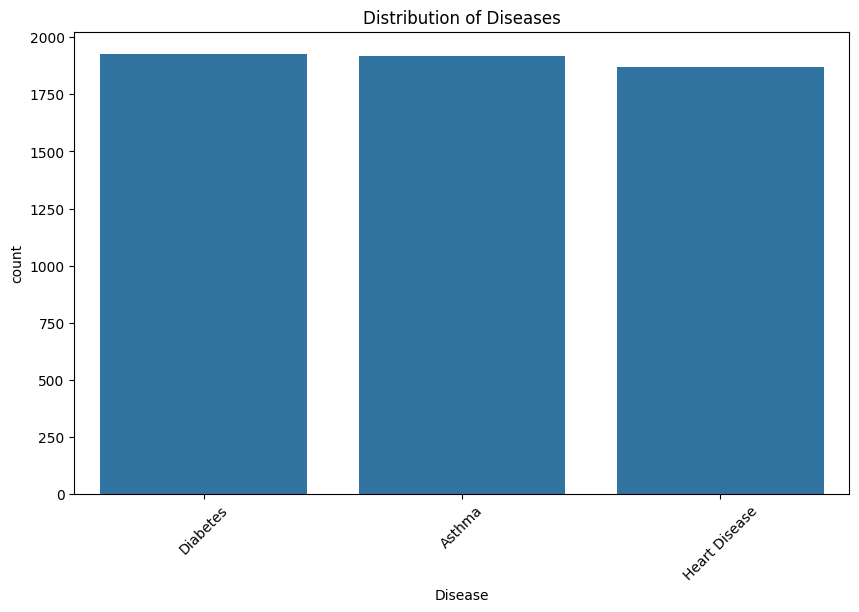

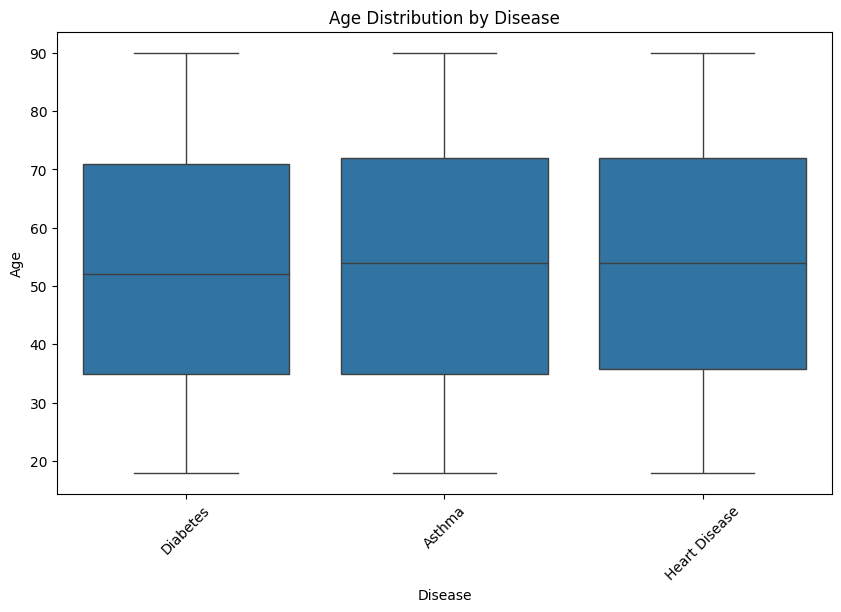

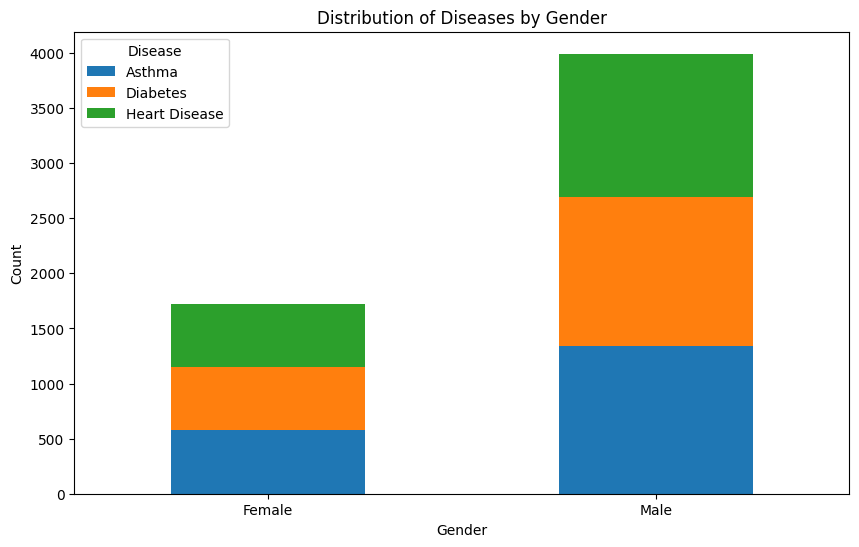

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Disease,Weight,Height,BMI
0,67,Male,208,158/88,72,NaN,114,162,43.438500
1,21,Male,389,165/93,98,Diabetes,102,143,49.880190
2,21,Female,324,174/99,72,Asthma,110,153,46.990474
3,84,Male,383,163/100,73,Diabetes,85,176,27.440599
4,66,Male,318,91/88,93,Asthma,62,184,18.312854


In [24]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load the dataset (assuming you've already loaded it)
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv("Original_Medical.csv")

# Display basic statistics of the dataset
basic_stats = data.describe()

# Visualize the distribution of diseases
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Disease')
plt.xticks(rotation=45)
plt.title('Distribution of Diseases')
plt.show()

# Explore the relationship between age and diseases
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Disease', y='Age')
plt.xticks(rotation=45)
plt.title('Age Distribution by Disease')
plt.show()

# Explore the relationship between gender and diseases
gender_disease = data.groupby(['Gender', 'Disease']).size().unstack()
gender_disease.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Diseases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Feature Engineering: Calculate BMI (Body Mass Index)
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

# Display the updated DataFrame with the new feature 'BMI'
data.head()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Load the dataset (replace with your actual file path)
data = pd.read_csv("Original_Medical.csv")
# Feature Engineering: Calculate BMI (Body Mass Index)
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

# Display the updated DataFrame with the new feature 'BMI'
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Disease,Weight,Height,BMI
0,67,Male,208,158/88,72,NaN,114,162,43.438500
1,21,Male,389,165/93,98,Diabetes,102,143,49.880190
2,21,Female,324,174/99,72,Asthma,110,153,46.990474
3,84,Male,383,163/100,73,Diabetes,85,176,27.440599
4,66,Male,318,91/88,93,Asthma,62,184,18.312854


In [27]:
# Split the 'Blood_Pressure' column into 'Systolic_BP' and 'Diastolic_BP'
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original 'Blood_Pressure' column
data.drop(columns=['Blood Pressure'], inplace=True)

# ... Rest of the data preprocessing code ...
X = data.drop(['Disease'], axis=1)
y = data['Disease']
# Standardize numerical features, excluding 'Systolic_BP' and 'Diastolic_BP'
scaler = StandardScaler()
columns_to_scale = ['Age', 'Weight', 'Height', 'Cholesterol','Heart Rate', 'BMI']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# # Split the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
data

,Age,Gender,Cholesterol,Heart Rate,Disease,Weight,Height,BMI,Systolic_BP,Diastolic_BP
0,67,Male,208,72,NaN,114,162,43.438500,158.0,88.0
1,21,Male,389,98,Diabetes,102,143,49.880190,165.0,93.0
2,21,Female,324,72,Asthma,110,153,46.990474,174.0,99.0
3,84,Male,383,73,Diabetes,85,176,27.440599,163.0,100.0
4,66,Male,318,93,Asthma,62,184,18.312854,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,Diabetes,84,162,32.007316,94.0,76.0
8759,28,Female,120,73,Asthma,70,140,35.714286,157.0,102.0
8760,47,Male,250,105,NaN,70,185,20.452885,161.0,75.0
8761,36,Male,178,60,Asthma,90,171,30.778701,119.0,67.0


In [8]:
# data = data.dropna(subset=['Disease'])

# # Encode categorical variables (e.g., 'Gender') using Label Encoding
# label_encoder = LabelEncoder()
# data['Gender'] = label_encoder.fit_transform(data['Gender'])

# # Split the data into features (X) and target (y)
# X = data.drop(['Disease'], axis=1)
# y = data['Disease']

# # Standardize numerical features
# # Standardize numerical features
# scaler = StandardScaler()
# X[['Age', 'Weight', 'Height', 'Cholesterol','Heart Rate', 'Systolic_BP', 'Diastolic_BP', 'BMI']] = scaler.fit_transform(X[['Age', 'Weight', 'Height', 'Cholesterol','Heart Rate', 'Systolic_BP', 'Diastolic_BP', 'BMI']])


# # Split the dataset into training and testing sets (adjust test_size as needed)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you've loaded your data into the 'data' DataFrame

# Drop rows with missing values in the 'Disease' column
data = data.dropna(subset=['Disease'])

# Encode categorical variables (e.g., 'Gender') using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the data into features (X) and target (y)
X = data.drop(['Disease'], axis=1)
y = data['Disease']

# Standardize numerical features
scaler = StandardScaler()
numeric_features = ['Age', 'Weight', 'Height', 'Cholesterol', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP', 'BMI']
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Split the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/j3/1rgpy41x3y91f29lr1h2gbqh0000gn/T/ipykernel_53546/795189894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [30]:
print(X.columns)

Index(['Age', 'Gender', 'Cholesterol', 'Heart Rate', 'Weight', 'Height', 'BMI',
       'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


In [31]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.33
               precision    recall  f1-score   support

       Asthma       0.34      0.35      0.35       387
     Diabetes       0.33      0.43      0.38       387
Heart Disease       0.30      0.21      0.24       370

     accuracy                           0.33      1144
    macro avg       0.33      0.33      0.32      1144
 weighted avg       0.33      0.33      0.32      1144

Confusion Matrix:
[[134 160  93]
 [136 167  84]
 [119 175  76]]


In [33]:
import joblib

# Assuming 'model' is your trained machine learning model
# Replace 'your_model_filename.pkl' with the desired filename
model_filename = 'Disease_model.pkl'

# Save the trained model to a file
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as Disease_model.pkl


In [19]:
import joblib

# Replace 'your_model_filename.pkl' with the actual filename and path
loaded_model = joblib.load('Disease_model.pkl')

In [20]:
age = 50
gender = 1
cholesterol = 200
heartRate  = 72
weight = 53
height = 160
bmi = 27
systolicBP = 135
diastolicBP = 85


user_input_data = {
    'Age': age,
    'Gender': gender,
    'Cholesterol' : cholesterol,
    'Heart Rate' : heartRate,
    'Weight': weight,
    'Height': height,
    'BMI': bmi,
    'Systolic_BP': systolicBP,
    'Diastolic_BP': diastolicBP
}

user_input_df = pd.DataFrame([user_input_data], columns=[
    'Age', 'Gender','Cholesterol', 'Heart Rate','Weight', 'Height','BMI', 'Systolic_BP', 'Diastolic_BP'])

# Make predictions using the loaded model
predicted_disease = loaded_model.predict(user_input_df)

# Display the predicted disease to the user
print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Asthma


In [ ]:
Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Disease,Weight,Height
73   Male      122         114/88       97   Heart Disease 96    174